# **Twitter NLP Draft - ODIN**

Data dikumpulkan menggunakan package *tweepy* dengan keyword *matematika*. Total tweet yang terkumpul sebanyak **2500 tweets.**

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

C:\Users\Lenovo\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [19]:
df = pd.read_csv(r"D:\dickys\Work\IYKRA\Training\NLP\tweet_matematika.csv")
df.head()

,screen_name,followers_count,location,text
0,icemilo0,637,bumi,@joktugfess Insyaallah saya bisa kak🙏🏻 sering ...
1,zxxsdfgh,1361,ㄴㅈㅁ,"matematika, b arab https://t.co/UdeGVi64Nk"
2,icemilo0,637,bumi,@joktugfess Insyaallah saya bisa kak🙏🏻 sering ...
3,manusyauwu,758,bismillah 2021 wisuda,@bertanyarl Matematika lah anjir benci bgt gw 😭
4,aamwin,157,semarang,Ingat Gambar Legendaris Dua Gunung dan Sawah W...


In [20]:
df_tweet = df[['text']]

In [21]:
df_tweet

,text
0,@joktugfess Insyaallah saya bisa kak🙏🏻 sering ...
1,"matematika, b arab https://t.co/UdeGVi64Nk"
2,@joktugfess Insyaallah saya bisa kak🙏🏻 sering ...
3,@bertanyarl Matematika lah anjir benci bgt gw 😭
4,Ingat Gambar Legendaris Dua Gunung dan Sawah W...
...,...
2445,@vwxyz13141 Matematika emang bikin masuk angin...
2446,ada rekomedasi ch yt buat belajar matematika &...
2447,@dragchic_ matematika seru banget loh kalo kam...
2448,@ddapioka aslian matematika seru bgt klo paham...


In [22]:
df_tweet['length'] = df_tweet['text'].apply(len)
df_tweet.head()

,text,length
0,@joktugfess Insyaallah saya bisa kak🙏🏻 sering ...,183
1,"matematika, b arab https://t.co/UdeGVi64Nk",42
2,@joktugfess Insyaallah saya bisa kak🙏🏻 sering ...,183
3,@bertanyarl Matematika lah anjir benci bgt gw 😭,47
4,Ingat Gambar Legendaris Dua Gunung dan Sawah W...,249


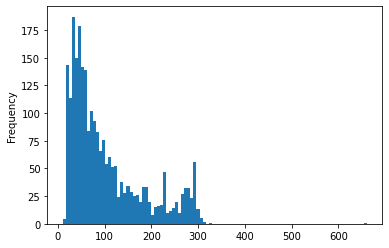

In [23]:
df_tweet['length'].plot(bins=100, kind='hist') 

In [24]:
df_tweet.describe()

,length
count,2450.000000
mean,102.768980
std,79.148354
min,10.000000
25%,43.000000
50%,74.000000
75%,140.000000
max,661.000000


In [25]:
df_tweet[df_tweet['length'] == 31]['text'].iloc[0]

'cara suka matematika gimana sih'

# Buang hastag, link, emoji, pic

In [26]:
#!pip install tweet-preprocessor

In [27]:
import preprocessor as p

In [28]:
# Sebelum diclean
df_tweet['text'][0]

'@joktugfess Insyaallah saya bisa kak🙏🏻 sering joki ujian/tugas/tutor matematika dan kalkulus. Testimoni selebihnya bisa liat di katalog https://t.co/aNdyi44XFW https://t.co/b2X8Bkw0Mt'

In [29]:
#Setelah clean
p.clean(df_tweet['text'][0])

'Insyaallah saya bisa kak sering joki ujian/tugas/tutor matematika dan kalkulus. Testimoni selebihnya bisa liat di katalog'

In [30]:
p.clean(df_tweet['text'][0]).replace('/', ' ')

'Insyaallah saya bisa kak sering joki ujian tugas tutor matematika dan kalkulus. Testimoni selebihnya bisa liat di katalog'

In [31]:
# Ganti \n dengan spasi
df_tweet['text'] = [x.replace('\n', ' ') for x in df_tweet['text']]

In [32]:
df_tweet['tweet_pre'] = df_tweet['text'].apply(p.clean)
# Ganti / dengan spasi
df_tweet['tweet_pre'] = [x.replace('/', ' ') for x in df_tweet['tweet_pre']]

In [33]:
df_tweet['length_pre'] = df_tweet['tweet_pre'].apply(len)

In [34]:
df_tweet.head(10)

,text,length,tweet_pre,length_pre
0,@joktugfess Insyaallah saya bisa kak🙏🏻 sering ...,183,Insyaallah saya bisa kak sering joki ujian tug...,121
1,"matematika, b arab https://t.co/UdeGVi64Nk",42,"matematika, b arab",18
2,@joktugfess Insyaallah saya bisa kak🙏🏻 sering ...,183,Insyaallah saya bisa kak sering joki ujian tug...,121
3,@bertanyarl Matematika lah anjir benci bgt gw 😭,47,Matematika lah anjir benci bgt gw,33
4,Ingat Gambar Legendaris Dua Gunung dan Sawah W...,249,Ingat Gambar Legendaris Dua Gunung dan Sawah W...,175
5,@bertanyarl Matematika dong,27,Matematika dong,15
6,@joktugfess Insyaallah saya bisa kak🙏🏻 sering ...,183,Insyaallah saya bisa kak sering joki ujian tug...,121
7,@convomfs Ngerjain matematika,29,Ngerjain matematika,19
8,ketika gue udah cape karna #matematika https:/...,62,ketika gue udah cape karna,26
9,Aku mau shere yang ini dlu frennn Materi Kelas...,251,Aku mau shere yang ini dlu frennn Materi Kelas...,145


In [35]:
df_tweet.iloc[122][0]

'semua guru matematika:)) kek wow aja gitu https://t.co/u2OKKPYrJt'

In [36]:
df_tweet.iloc[122][2]

'semua guru matematika kek wow aja gitu'

## Ganti kata slang

Pake regex: https://www.regular-expressions.info/wordboundaries.html

In [37]:
slang = pd.read_csv(r"D:\dickys\Work\IYKRA\Training\NLP\colloquial-indonesian-lexicon.csv")
slang = dict(zip(slang['slang'], slang['formal']))
slang = {r"\b{}\b".format(k): v for k, v in slang.items()}
slang

{'\\bwoww\\b': 'wow',
 '\\baminn\\b': 'amin',
 '\\bmet\\b': 'selamat',
 '\\bnetaas\\b': 'menetas',
 '\\bkeberpa\\b': 'keberapa',
 '\\beeeehhhh\\b': 'eh',
 '\\bkata2nyaaa\\b': 'kata-katanya',
 '\\bhallo\\b': 'halo',
 '\\bkaka\\b': 'kakak',
 '\\bka\\b': 'kak',
 '\\bdaah\\b': 'dah',
 '\\baaaaahhhh\\b': 'ah',
 '\\byaa\\b': 'ya',
 '\\bsmga\\b': 'semoga',
 '\\bslalu\\b': 'selalu',
 '\\bamiin\\b': 'amin',
 '\\bkk\\b': 'kakak',
 '\\btrus\\b': 'terus',
 '\\bsii\\b': 'sih',
 '\\bnyenengin\\b': 'menyenangkan',
 '\\bbgt\\b': 'banget',
 '\\bgemess\\b': 'gemas',
 '\\bakuuu\\b': 'aku',
 '\\bjgn\\b': 'jangan',
 '\\budah\\b': 'sudah',
 '\\bgitu\\b': 'begitu',
 '\\baja\\b': 'saja',
 '\\bgemesiin\\b': 'menggemaskan',
 '\\bmenyenangkn\\b': 'menyenangkan',
 '\\brb\\b': 'ribu',
 '\\bakau\\b': 'aku',
 '\\bsaranin\\b': 'menyarankan',
 '\\bnemuin\\b': 'menemukan',
 '\\byah\\b': 'ya',
 '\\bmnis2nya\\b': 'manis-manisnya',
 '\\bgtu\\b': 'begitu',
 '\\btu\\b': 'itu',
 '\\bidolaa\\b': 'idola',
 '\\bbangett\\b': 'ba

In [38]:
df_tweet['tweet_form'] = df_tweet['tweet_pre'].replace(slang, regex=True)

In [39]:
df_tweet.head(10)

,text,length,tweet_pre,length_pre,tweet_form
0,@joktugfess Insyaallah saya bisa kak🙏🏻 sering ...,183,Insyaallah saya bisa kak sering joki ujian tug...,121,Insyaallah saya bisa kak sering joki ujian tug...
1,"matematika, b arab https://t.co/UdeGVi64Nk",42,"matematika, b arab",18,"matematika, b arab"
2,@joktugfess Insyaallah saya bisa kak🙏🏻 sering ...,183,Insyaallah saya bisa kak sering joki ujian tug...,121,Insyaallah saya bisa kak sering joki ujian tug...
3,@bertanyarl Matematika lah anjir benci bgt gw 😭,47,Matematika lah anjir benci bgt gw,33,Matematika lah anjir benci banget gue
4,Ingat Gambar Legendaris Dua Gunung dan Sawah W...,249,Ingat Gambar Legendaris Dua Gunung dan Sawah W...,175,Ingat Gambar Legendaris Dua Gunung dan Sawah W...
5,@bertanyarl Matematika dong,27,Matematika dong,15,Matematika dong
6,@joktugfess Insyaallah saya bisa kak🙏🏻 sering ...,183,Insyaallah saya bisa kak sering joki ujian tug...,121,Insyaallah saya bisa kak sering joki ujian tug...
7,@convomfs Ngerjain matematika,29,Ngerjain matematika,19,Ngerjain matematika
8,ketika gue udah cape karna #matematika https:/...,62,ketika gue udah cape karna,26,ketika gue sudah capek karena
9,Aku mau shere yang ini dlu frennn Materi Kelas...,251,Aku mau shere yang ini dlu frennn Materi Kelas...,145,Aku mau shere yang ini dulu frennn Materi Kela...


In [40]:
words_lst_before = []
words_lst_after = []
for x in range(len(df_tweet)):
    words = df_tweet['tweet_form'][x].split()
    words = [x.lower() for x in words]
    words_lst_after.extend(words)
    
    words = df_tweet['tweet_pre'][x].split()
    words = [x.lower() for x in words]
    words_lst_before.extend(words)
    
print("Total unique vocab sebelum koreksi slang:", len(pd.DataFrame(words_lst_before).value_counts()))
print("Total unique vocab setelah koreksi slang:", len(pd.DataFrame(words_lst_after).value_counts()))

Total unique vocab sebelum koreksi slang: 6914
Total unique vocab setelah koreksi slang: 6571


## Buang tanda baca dan stopwords

In [41]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [42]:
#!pip install Sastrawi

In [43]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
factory = StopWordRemoverFactory()
stopwords = factory.get_stop_words()
print(stopwords)

['yang', 'untuk', 'pada', 'ke', 'para', 'namun', 'menurut', 'antara', 'dia', 'dua', 'ia', 'seperti', 'jika', 'jika', 'sehingga', 'kembali', 'dan', 'tidak', 'ini', 'karena', 'kepada', 'oleh', 'saat', 'harus', 'sementara', 'setelah', 'belum', 'kami', 'sekitar', 'bagi', 'serta', 'di', 'dari', 'telah', 'sebagai', 'masih', 'hal', 'ketika', 'adalah', 'itu', 'dalam', 'bisa', 'bahwa', 'atau', 'hanya', 'kita', 'dengan', 'akan', 'juga', 'ada', 'mereka', 'sudah', 'saya', 'terhadap', 'secara', 'agar', 'lain', 'anda', 'begitu', 'mengapa', 'kenapa', 'yaitu', 'yakni', 'daripada', 'itulah', 'lagi', 'maka', 'tentang', 'demi', 'dimana', 'kemana', 'pula', 'sambil', 'sebelum', 'sesudah', 'supaya', 'guna', 'kah', 'pun', 'sampai', 'sedangkan', 'selagi', 'sementara', 'tetapi', 'apakah', 'kecuali', 'sebab', 'selain', 'seolah', 'seraya', 'seterusnya', 'tanpa', 'agak', 'boleh', 'dapat', 'dsb', 'dst', 'dll', 'dahulu', 'dulunya', 'anu', 'demikian', 'tapi', 'ingin', 'juga', 'nggak', 'mari', 'nanti', 'melainkan', '

cita-cita -> citacita, harusnya cita cita

bisa-bisanya -> bisabisanya, harusnya bisa bisanya

Saya mau pergi ke pasar.Tapi -> pasartapi

In [44]:
message = 'bisa-bisanya'
blk = ''
for char in message:
    if char not in string.punctuation:
        blk += char
    else:
        blk += " "
print(blk)

bisa bisanya


In [45]:
def message_cleaning(message):
    # test_punc_removed = [char for char in message if char not in string.punctuation]
    test_punc_removed = ''
    for char in message:
        if char not in string.punctuation:
            test_punc_removed += char
        else:
            test_punc_removed += " "
            
    test_punc_removed_join = ''.join(test_punc_removed)
    test_punc_removed_join_clean = [word for word in test_punc_removed_join.split() if word.lower() not in stopwords]
    test_punc_removed_join_clean = " ".join(test_punc_removed_join_clean)
    return test_punc_removed_join_clean

In [46]:
df_tweet['tweet_clean'] = df_tweet['tweet_form'].apply(message_cleaning)

In [47]:
df_tweet.head()

,text,length,tweet_pre,length_pre,tweet_form,tweet_clean
0,@joktugfess Insyaallah saya bisa kak🙏🏻 sering ...,183,Insyaallah saya bisa kak sering joki ujian tug...,121,Insyaallah saya bisa kak sering joki ujian tug...,Insyaallah kak sering joki ujian tugas tutor m...
1,"matematika, b arab https://t.co/UdeGVi64Nk",42,"matematika, b arab",18,"matematika, b arab",matematika b arab
2,@joktugfess Insyaallah saya bisa kak🙏🏻 sering ...,183,Insyaallah saya bisa kak sering joki ujian tug...,121,Insyaallah saya bisa kak sering joki ujian tug...,Insyaallah kak sering joki ujian tugas tutor m...
3,@bertanyarl Matematika lah anjir benci bgt gw 😭,47,Matematika lah anjir benci bgt gw,33,Matematika lah anjir benci banget gue,Matematika lah anjir benci banget gue
4,Ingat Gambar Legendaris Dua Gunung dan Sawah W...,249,Ingat Gambar Legendaris Dua Gunung dan Sawah W...,175,Ingat Gambar Legendaris Dua Gunung dan Sawah W...,Ingat Gambar Legendaris Gunung Sawah Waktu SD ...


In [48]:
df_tweet['length_clean'] = df_tweet['tweet_clean'].apply(len)

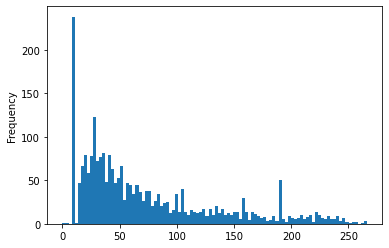

In [49]:
df_tweet['length_clean'].plot(bins=100, kind='hist') 

In [50]:
df_tweet['text'][124]

'@bertanyarl aaa matematika gw bolot bgt😭😭 ampe gw liat tu angka2, kaga kegambar di otak gw salah satu rumusnya😭😭😭😭'

In [51]:
df_tweet['tweet_pre'][124]

'aaa matematika gw bolot bgt ampe gw liat tu angka2, kaga kegambar di otak gw salah satu rumusnya'

In [52]:
df_tweet['tweet_form'][124]

'aaa matematika gue bolot banget sampai gue lihat itu angka2, kagak kegambar di otak gue salah satu rumusnya'

In [53]:
df_tweet['tweet_clean'][124]

'aaa matematika gue bolot banget gue lihat angka2 kagak kegambar otak gue salah satu rumusnya'

In [54]:
words_lst_clean = []
for x in range(len(df_tweet)):
    words = df_tweet['tweet_clean'][x].split()
    words = [x.lower() for x in words]
    words_lst_clean.extend(words)
    
print("Total unique vocab sebelum koreksi slang:", len(pd.DataFrame(words_lst_before).value_counts()))
print("Total unique vocab setelah koreksi slang:", len(pd.DataFrame(words_lst_after).value_counts()))
print("Total unique vocab setelah buang punctuation dan stopwords:", len(pd.DataFrame(words_lst_clean).value_counts()))

Total unique vocab sebelum koreksi slang: 6914
Total unique vocab setelah koreksi slang: 6571
Total unique vocab setelah buang punctuation dan stopwords: 4979


In [55]:
df_tweet['tweet_regex'] = df_tweet['tweet_clean'].astype(str).str.replace(r'([a-zA-Z])\1+', r'\1')

words_lst_regex = []
for x in range(len(df_tweet)):
    words = df_tweet['tweet_regex'][x].split()
    words = [x.lower() for x in words]
    words_lst_regex.extend(words)
    
print("Total unique vocab sebelum koreksi slang:", len(pd.DataFrame(words_lst_before).value_counts()))
print("Total unique vocab setelah koreksi slang:", len(pd.DataFrame(words_lst_after).value_counts()))
print("Total unique vocab setelah buang punctuation dan stopwords:", len(pd.DataFrame(words_lst_clean).value_counts()))
print("Total unique regex:", len(pd.DataFrame(words_lst_regex).value_counts()))

Total unique vocab sebelum koreksi slang: 6914
Total unique vocab setelah koreksi slang: 6571
Total unique vocab setelah buang punctuation dan stopwords: 4979
Total unique regex: 4780


# Count vec

In [56]:
from sklearn.feature_extraction.text import CountVectorizer

In [57]:
corpus_1 = [x.lower() for x in df_tweet['tweet_regex']]
corpus_1

['insyalah kak sering joki ujian tugas tutor matematika kalkulus testimoni selebihnya lihat katalog',
 'matematika b arab',
 'insyalah kak sering joki ujian tugas tutor matematika kalkulus testimoni selebihnya lihat katalog',
 'matematika lah anjir benci banget gue',
 'ingat gambar legendaris gunung sawah waktu sd bukan mitos wujud aslinya whatsap indosiar ngabalin gisele best girl sara bem ui tahlil nasional wanita matematika',
 'matematika dong',
 'insyalah kak sering joki ujian tugas tutor matematika kalkulus testimoni selebihnya lihat katalog',
 'ngerjain matematika',
 'gue capek',
 'aku mau shere dulu fren materi kelas m a t e r i semua mapel matematika amp ipa bindo ipa ips mtk pkn rangkuman ipa us un',
 'fisika anjir matematika sedikit semangat kalo fisika orang bodoh',
 'wah benar banget pas mengajar fisika sama matematika adah wkwkwk',
 'gua literaly diam bingung mikir mtk apa pas tulisan mtk matematika nurul matematika ilmu menyenangkan bisanya kamu lupa',
 'kira orang kriste

In [58]:
import regex as re
pattern = r'[0-9]'
new_corpus = [re.sub(pattern, '', x) for x in corpus_1]
new_corpus

['insyalah kak sering joki ujian tugas tutor matematika kalkulus testimoni selebihnya lihat katalog',
 'matematika b arab',
 'insyalah kak sering joki ujian tugas tutor matematika kalkulus testimoni selebihnya lihat katalog',
 'matematika lah anjir benci banget gue',
 'ingat gambar legendaris gunung sawah waktu sd bukan mitos wujud aslinya whatsap indosiar ngabalin gisele best girl sara bem ui tahlil nasional wanita matematika',
 'matematika dong',
 'insyalah kak sering joki ujian tugas tutor matematika kalkulus testimoni selebihnya lihat katalog',
 'ngerjain matematika',
 'gue capek',
 'aku mau shere dulu fren materi kelas m a t e r i semua mapel matematika amp ipa bindo ipa ips mtk pkn rangkuman ipa us un',
 'fisika anjir matematika sedikit semangat kalo fisika orang bodoh',
 'wah benar banget pas mengajar fisika sama matematika adah wkwkwk',
 'gua literaly diam bingung mikir mtk apa pas tulisan mtk matematika nurul matematika ilmu menyenangkan bisanya kamu lupa',
 'kira orang kriste

In [59]:
vectorizer = CountVectorizer()
bow_model = vectorizer.fit_transform(new_corpus)
print(bow_model)

  (0, 1643)	1
  (0, 1841)	1
  (0, 3880)	1
  (0, 1787)	1
  (0, 4463)	1
  (0, 4409)	1
  (0, 4434)	1
  (0, 2414)	1
  (0, 1855)	1
  (0, 4307)	1
  (0, 3826)	1
  (0, 2239)	1
  (0, 1885)	1
  (1, 2414)	1
  (1, 214)	1
  (2, 1643)	1
  (2, 1841)	1
  (2, 3880)	1
  (2, 1787)	1
  (2, 4463)	1
  (2, 4409)	1
  (2, 4434)	1
  (2, 2414)	1
  (2, 1855)	1
  (2, 4307)	1
  :	:
  (2447, 1856)	1
  (2447, 1863)	1
  (2447, 2596)	1
  (2447, 3883)	1
  (2447, 691)	1
  (2447, 2950)	1
  (2447, 2274)	1
  (2448, 2414)	2
  (2448, 330)	1
  (2448, 81)	1
  (2448, 1856)	1
  (2448, 3692)	1
  (2448, 3135)	1
  (2448, 3883)	2
  (2448, 1837)	1
  (2448, 4312)	1
  (2448, 2420)	1
  (2448, 4343)	1
  (2448, 246)	1
  (2449, 2414)	1
  (2449, 330)	1
  (2449, 81)	1
  (2449, 144)	1
  (2449, 1055)	1
  (2449, 934)	1


In [60]:
vectorizer.get_feature_names()

['aamin',
 'abang',
 'abdulah',
 'abis',
 'about',
 'absen',
 'absolute',
 'abu',
 'abul',
 'aconcagua',
 'action',
 'ada',
 'adah',
 'adain',
 'adakah',
 'adanya',
 'adat',
 'adek',
 'adeku',
 'adh',
 'adik',
 'adiku',
 'adiputra',
 'administrasi',
 'ado',
 'adrenaline',
 'aduh',
 'advance',
 'adzan',
 'ae',
 'af',
 'afa',
 'afief',
 'aga',
 'agak',
 'agaknya',
 'agama',
 'agroekoteknologi',
 'agustus',
 'ah',
 'ahaha',
 'ahahaha',
 'ahahahahah',
 'ahli',
 'ahlinya',
 'ahmad',
 'aing',
 'air',
 'airlanga',
 'aja',
 'ajadah',
 'ajak',
 'ajalah',
 'ajang',
 'ajari',
 'ajarkan',
 'ajarono',
 'ajg',
 'ajib',
 'ajlok',
 'ajo',
 'akademik',
 'akal',
 'akalan',
 'akar',
 'akh',
 'akhir',
 'akhirnya',
 'akhlak',
 'akl',
 'akm',
 'akmil',
 'akmu',
 'akpol',
 'akreditas',
 'akreditasi',
 'aksioma',
 'aktif',
 'aktivitas',
 'aktuaria',
 'aktuaris',
 'aku',
 'akun',
 'akuntan',
 'akuntansi',
 'akutansi',
 'al',
 'ala',
 'alah',
 'alahuakbar',
 'alahurabi',
 'alam',
 'alami',
 'alasan',
 'alat',
 

In [61]:
bow_model_df = pd.DataFrame(bow_model.toarray(), columns = vectorizer.get_feature_names()) 
bow_model_df

,aamin,abang,abdulah,abis,about,absen,absolute,abu,abul,aconcagua,...,zen,zenbot,zencore,zenius,zhong,zom,zona,zonaba,zonauang,zonk
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2445,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2446,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2447,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2448,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# td-idf

In [62]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [63]:
vectorizer = TfidfVectorizer()
tfidf_model = vectorizer.fit_transform(new_corpus)
print(tfidf_model)

  (0, 1885)	0.3357447431421132
  (0, 2239)	0.292170872961206
  (0, 3826)	0.3357447431421132
  (0, 4307)	0.2556018914673119
  (0, 1855)	0.2934178079161541
  (0, 2414)	0.0594451035834688
  (0, 4434)	0.3161854452122387
  (0, 4409)	0.21488238442379134
  (0, 4463)	0.29094964984633614
  (0, 1787)	0.2296238060508491
  (0, 3880)	0.3000795664883126
  (0, 1841)	0.22274329479163796
  (0, 1643)	0.3332240553813217
  (1, 214)	0.9833843409592816
  (1, 2414)	0.1815357759673815
  (2, 1885)	0.3357447431421132
  (2, 2239)	0.292170872961206
  (2, 3826)	0.3357447431421132
  (2, 4307)	0.2556018914673119
  (2, 1855)	0.2934178079161541
  (2, 2414)	0.0594451035834688
  (2, 4434)	0.3161854452122387
  (2, 4409)	0.21488238442379134
  (2, 4463)	0.29094964984633614
  (2, 1787)	0.2296238060508491
  :	:
  (2447, 691)	0.37207677874820516
  (2447, 3883)	0.3496622598630575
  (2447, 2596)	0.3599312002037019
  (2447, 1863)	0.3195527055245529
  (2447, 1856)	0.2545170294797833
  (2447, 330)	0.22570591535047205
  (2447, 2414

In [64]:
print(tfidf_model.toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [65]:
vectorizer.get_feature_names()

['aamin',
 'abang',
 'abdulah',
 'abis',
 'about',
 'absen',
 'absolute',
 'abu',
 'abul',
 'aconcagua',
 'action',
 'ada',
 'adah',
 'adain',
 'adakah',
 'adanya',
 'adat',
 'adek',
 'adeku',
 'adh',
 'adik',
 'adiku',
 'adiputra',
 'administrasi',
 'ado',
 'adrenaline',
 'aduh',
 'advance',
 'adzan',
 'ae',
 'af',
 'afa',
 'afief',
 'aga',
 'agak',
 'agaknya',
 'agama',
 'agroekoteknologi',
 'agustus',
 'ah',
 'ahaha',
 'ahahaha',
 'ahahahahah',
 'ahli',
 'ahlinya',
 'ahmad',
 'aing',
 'air',
 'airlanga',
 'aja',
 'ajadah',
 'ajak',
 'ajalah',
 'ajang',
 'ajari',
 'ajarkan',
 'ajarono',
 'ajg',
 'ajib',
 'ajlok',
 'ajo',
 'akademik',
 'akal',
 'akalan',
 'akar',
 'akh',
 'akhir',
 'akhirnya',
 'akhlak',
 'akl',
 'akm',
 'akmil',
 'akmu',
 'akpol',
 'akreditas',
 'akreditasi',
 'aksioma',
 'aktif',
 'aktivitas',
 'aktuaria',
 'aktuaris',
 'aku',
 'akun',
 'akuntan',
 'akuntansi',
 'akutansi',
 'al',
 'ala',
 'alah',
 'alahuakbar',
 'alahurabi',
 'alam',
 'alami',
 'alasan',
 'alat',
 

In [49]:
tfidf_model_df = pd.DataFrame(tfidf_model.toarray(), columns = vectorizer.get_feature_names()) 
tfidf_model_df.iloc[0,1885]

0.3357447431421132

# POS Tagging

In [ ]:
#pip install gensim==3.4.0

In [8]:
#pip install smart_open

Note: you may need to restart the kernel to use updated packages.


In [69]:
from flair.data_fetcher import NLPTaskDataFetcher, NLPTask
corpus = NLPTaskDataFetcher.load_corpus(NLPTask.UD_INDONESIAN)

2021-07-25 16:41:19,699 Reading data from C:\Users\Lenovo\.flair\datasets\ud_indonesian
2021-07-25 16:41:19,699 Train: C:\Users\Lenovo\.flair\datasets\ud_indonesian\id_gsd-ud-train.conllu
2021-07-25 16:41:19,699 Dev: C:\Users\Lenovo\.flair\datasets\ud_indonesian\id_gsd-ud-dev.conllu
2021-07-25 16:41:19,699 Test: C:\Users\Lenovo\.flair\datasets\ud_indonesian\id_gsd-ud-test.conllu


In [70]:
tag_type = 'upos' # bisa 'ner'
tag_dictionary = corpus.make_tag_dictionary(tag_type=tag_type)

In [73]:
from flair.embeddings import TokenEmbeddings, WordEmbeddings, StackedEmbeddings, BertEmbeddings
from typing import List
embedding_types: List[TokenEmbeddings] = [
 WordEmbeddings('id-crawl'),
 WordEmbeddings('id'),
]
embeddings: StackedEmbeddings = StackedEmbeddings(embeddings=embedding_types)

In [74]:
from flair.models import SequenceTagger
tagger: SequenceTagger = SequenceTagger(hidden_size=128,
                                        embeddings=embeddings,
                                        tag_dictionary=tag_dictionary,
                                        tag_type=tag_type,
                                        use_crf=True)

In [ ]:
from flair.trainers import ModelTrainer
trainer: ModelTrainer = ModelTrainer(tagger, corpus)
trainer.train('resources/taggers/example-universal-pos',
    learning_rate=0.1,
    mini_batch_size=32,
    max_epochs=10)

In [75]:
from flair.data import Sentence
sentence = Sentence('saya dan dia kemarin pegi ke pasar bersama untuk membeli jeru')
tag_pos = SequenceTagger.load('resources/taggers/example-universal-pos/best-model.pt')
tag_pos.predict(sentence)
print(sentence.to_tagged_string())

2021-07-25 16:42:42,999 loading file resources/taggers/example-universal-pos/best-model.pt
saya <PRON> dan <CCONJ> dia <PRON> kemarin <VERB> pegi <NOUN> ke <ADP> pasar <NOUN> bersama <ADJ> untuk <ADP> membeli <VERB> jeru <PROPN>


In [76]:
sentence = Sentence(df_tweet['tweet_clean'][0])
tag_pos.predict(sentence)
print(sentence.to_tagged_string())

Insyaallah <PROPN> kak <PROPN> sering <ADV> joki <NOUN> ujian <NOUN> tugas <NOUN> tutor <NOUN> matematika <NOUN> kalkulus <NOUN> Testimoni <PROPN> selebihnya <ADV> lihat <VERB> katalog <NOUN>


In [77]:
sentence = Sentence(df_tweet['tweet_clean'][590])
tag_pos.predict(sentence)
print(sentence.to_tagged_string())

angka <NOUN> positif <ADJ> matematika <NOUN> kok <PART> enggak <VERB> pernah <ADV> pakai <VERB> masker <NOUN>


# NER

https://yudanta.github.io/posts/train-an-indonesian-ner-from-a-blank-spacy-model/

In [15]:
import pickle
import spacy
import random
from spacy.util import minibatch, compounding
from spacy import load, displacy
from spacy.training.example import Example

In [3]:
with open(r'D:\dickys\Work\IYKRA\Training\NLP\ner_spacy_fmt_datasets.pickle', 'rb') as f:
    ner_spacy_fmt_datasets = pickle.load(f)

In [5]:
nlp=spacy.blank("id")
nlp.add_pipe('ner')
nlp.begin_training()

In [6]:
ner=nlp.get_pipe("ner")
pipe_exceptions = ["ner", "trf_wordpiecer", "trf_tok2vec"]
unaffected_pipes = [pipe for pipe in nlp.pipe_names if pipe not in pipe_exceptions]

In [7]:
for _, annotations in ner_spacy_fmt_datasets:
    for ent in annotations.get("entities"):
        ner.add_label(ent[2])
        break

In [16]:
# TRAINING THE MODEL
with nlp.disable_pipes(*unaffected_pipes):

  # Training for 5 iterations
  for iteration in range(5):

    # shuufling examples  before every iteration
    random.shuffle(ner_spacy_fmt_datasets)
    losses = {}
    # batch up the examples using spaCy's minibatch
    batches = minibatch(ner_spacy_fmt_datasets, size=compounding(4.0, 32.0, 1.001))
    for batch in batches:
        texts, annotations = zip(*batch)
        
        example = []
        # Update the model with iterating each text
        for i in range(len(texts)):
            doc = nlp.make_doc(texts[i])
            example.append(Example.from_dict(doc, annotations[i]))

        # Update the model
        nlp.update(example, drop=0.5, losses=losses)
            
    
    
    print("Losses at iteration {}".format(iteration), losses)

Losses at iteration 0 {'ner': 7082.5269307321405}
Losses at iteration 1 {'ner': 4514.951706161583}
Losses at iteration 2 {'ner': 3997.3980809966947}
Losses at iteration 3 {'ner': 3706.417788604043}
Losses at iteration 4 {'ner': 3246.1057999245054}


In [66]:
doc = nlp(df_tweet['tweet_clean'][120])

print(doc.ents)
print("Entities", [(ent.text, ent.label_) for ent in doc.ents])

()
Entities []


In [67]:
for i in range(955,985):
  doc = nlp(df_tweet['tweet_clean'][i])
  if len(doc.ents) > 0:
    print("Isi Tweet:", df_tweet['tweet_clean'][i])
    print(doc.ents)
    print("Entities", [(ent.text, ent.label_) for ent in doc.ents])
    print(" ")

Isi Tweet: menurutku kayak sih A jago matematika nah kamu enggak jadi gara gara sih A kamu jadi terpengaruh sama ikutan berlaku banyak sih sebenrnya aku tangkap maskudnya sih enggak tau benar apa engganya hehehe
(A jago matematika nah kamu enggak jadi gara gara,)
Entities [('A jago matematika nah kamu enggak jadi gara gara', 'QUANTITY')]
 
Isi Tweet: Kata Army rumus matematika sulit pecahan kan
(Army,)
Entities [('Army', 'PERSON')]
 
Isi Tweet: bahasa Indonesia bahasa Inggris matematika fisika kimia biologi
(Indonesia, Inggris)
Entities [('Indonesia', 'LOCATION'), ('Inggris', 'LOCATION')]
 
Isi Tweet: Plajari kls soalnya buat belajar mapel kelas sama kudu paham kelas terutama fisika kimia matematika Klo biologi sih enggak soalnya kls taksonomi kls sistem tubuh
(Klo,)
Entities [('Klo', 'PERSON')]
 
Isi Tweet: Guru bahasa indonesia gue semuanya santuy santuy friendly matematika
(Guru,)
Entities [('Guru', 'PERSON')]
 
Isi Tweet: Wkwkw iya tau gue enggak pintar matematika enggak lo kayak
(